In [10]:
import geopandas
import starepandas
import matplotlib.pyplot as plt

In [5]:
fname = 'zip://data/amapoly_ivb.zip'
amazon = geopandas.read_file(fname) # Nice flex
amazon = amazon.to_crs('EPSG:4326')
amazon['geom_simple'] = amazon.simplify(0.02)
amazon.set_geometry('geom_simple', inplace=True)

stare = starepandas.stare_from_gdf(amazon, level=10, force_ccw=True)
amazon = starepandas.STAREDataFrame(amazon, stare=stare)

trixels = amazon.trixels()
amazon.set_trixels(trixels, inplace=True)

In [7]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries = countries.sort_values(by='name')
samerica = countries[countries.continent=='South America']

stare = starepandas.stare_from_gdf(samerica, level=10, force_ccw=True)
samerica = starepandas.STAREDataFrame(samerica, stare=stare)
trixels = samerica.trixels()
samerica.set_trixels(trixels, inplace=True)

In [8]:
stare_amazon = samerica.stare_intersection(amazon.stare.iloc[0])
samerica['stare_amazon'] = stare_amazon
samerica['trixel_amazon'] = samerica.trixels(stare_column='stare_amazon')

<AxesSubplot:>

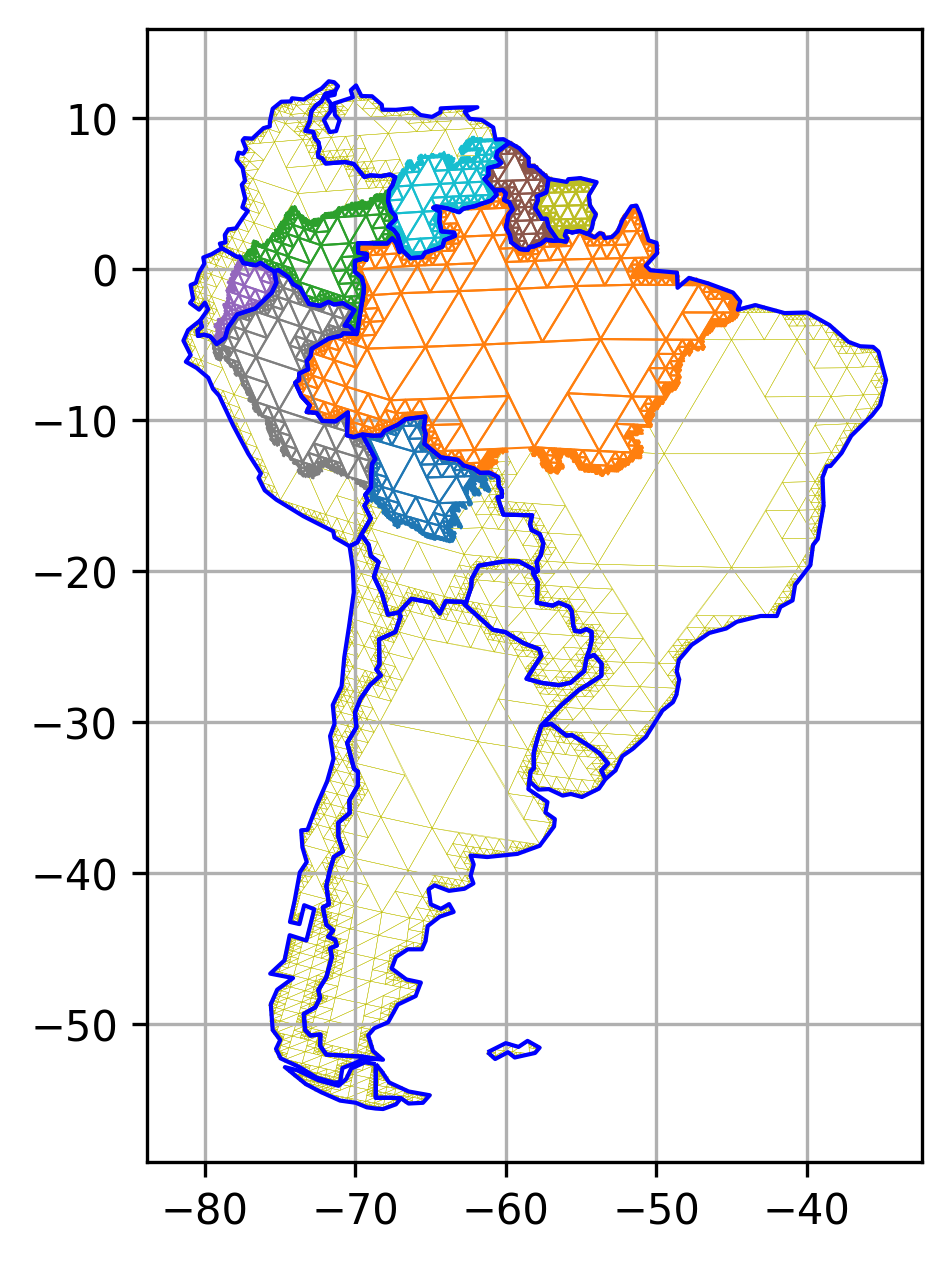

In [11]:
fig, ax = plt.subplots(figsize=(13,5), dpi=300)
ax.grid(True)

samerica.plot(ax=ax, trixels=True, color='y', lw=0.1, zorder=0)
samerica.plot(ax=ax, trixels=False, facecolor='none', edgecolor='blue', lw=1, zorder=4)
df = samerica.set_geometry('trixel_amazon')
df = df[df.geometry.is_empty==False]
df = df.set_geometry(df.geometry.boundary)
df.plot(ax=ax, zorder=3, column='name', lw=0.5)